Creattion of a training dataset

In [7]:
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from schnapsen.bots import RdeepBot, AlphaBetaBot, RandBot
from schnapsen.game import (SchnapsenGamePlayEngine, GameState, BotState, SchnapsenDeckGenerator, 
                            SchnapsenHandGenerator, Bot, Score)
from schnapsen.game import Talon, Suit
from nn_bot import NNDataBot, NNPlayingBot, train_NN_model, create_replay_memory_dataset, train_model, play_games_and_return_stats, play_games_and_return_stats_test
import random
import pathlib 

bot1 = RdeepBot(5, 5, random.Random(40), "Rdeepbot_1")
bot2 = RdeepBot(10, 10, random.Random(80), "RdeepBot_2")
create_replay_memory_dataset(bot1=bot1, bot2=bot2)


An existing dataset was found at location 'NN_replay_memories\rdeep_rdeep_1k_games.txt', which will be deleted as selected.
Progress: 50/1000
Progress: 100/1000
Progress: 150/1000
Progress: 200/1000
Progress: 250/1000
Progress: 300/1000
Progress: 350/1000
Progress: 400/1000
Progress: 450/1000
Progress: 500/1000
Progress: 550/1000
Progress: 600/1000
Progress: 650/1000
Progress: 700/1000
Progress: 750/1000
Progress: 800/1000
Progress: 850/1000
Progress: 900/1000
Progress: 950/1000
Progress: 1000/1000
Replay memory dataset recorder for 1000 games.
Dataset is stored at: NN_replay_memories\rdeep_rdeep_1k_games.txt


Train 10 Neural Network models that range in hidden layer number from 1 to 10

In [8]:
for numberOfLayers in range(1,11):
    number_of_hidden_layers = (10, ) * numberOfLayers
    train_model(number_of_hidden_layers)

Model at NN_models\NN_model_10 exists already and will be overwritten as selected.
Dataset Statistics:
Samples of wins: 7483
Samples of losses: 7483
Training a Complex (Neural Network) model.
Starting training phase...
Iteration 1, loss = 0.98322424
Validation score: 0.410822
Iteration 2, loss = 0.91625862
Validation score: 0.418170
Iteration 3, loss = 0.85662948
Validation score: 0.445558
Iteration 4, loss = 0.80486388
Validation score: 0.464262
Iteration 5, loss = 0.76182639
Validation score: 0.499666
Iteration 6, loss = 0.72953416
Validation score: 0.518370
Iteration 7, loss = 0.70736125
Validation score: 0.537742
Iteration 8, loss = 0.69240126
Validation score: 0.563794
Iteration 9, loss = 0.68171560
Validation score: 0.587842
Iteration 10, loss = 0.67391065
Validation score: 0.593186
Iteration 11, loss = 0.66805821
Validation score: 0.592518
Iteration 12, loss = 0.66364599
Validation score: 0.600534
Iteration 13, loss = 0.66027467
Validation score: 0.608550
Iteration 14, loss = 0.

Creare 10 bots using models created above

In [9]:
path  = "NN_model"
bots = []
for numberOfLayers in range(1,11):
    model_location = pathlib.Path("NN_models") / ("NN_model" + "_10" * numberOfLayers)
    bots.append(NNPlayingBot(model_location=model_location, name = "MLPlayingBot_" + str(numberOfLayers)))

Each bot plays 1000 games against aplha beta pruning bot

Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_1 is 0.363
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_2 is 0.371
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_3 is 0.373
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_4 is 0.351
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_5 is 0.37
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_6 is 0.381
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_7 is 0.34
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_8 is 0.365
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_9 is 0.37
Progress: 500/1000
Progress: 1000/1000
Winrate of MLPlayingBot_10 is 0.378
[(1, 0.363), (2, 0.371), (3, 0.373), (4, 0.351), (5, 0.37), (6, 0.381), (7, 0.34), (8, 0.365), (9, 0.37), (10, 0.378)]


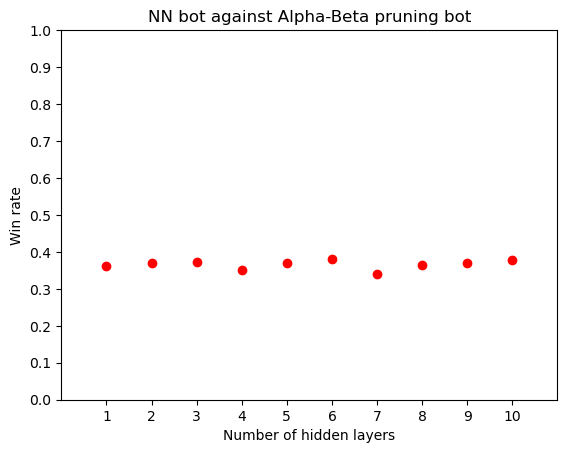

In [12]:
alphabeta_bot = AlphaBetaBot("Alpha-Beta_bot")
data = []
for bot in bots:
    data.append((int(''.join([char for char in bot._Bot__name if char not in "MLPlayingBot_"])), play_games_and_return_stats(bot, alphabeta_bot, 1000)))
    print(f"Winrate of {bot._Bot__name} is {data[-1][1]}")
print(data)
x, y = zip(*data)
x = list(x)
y = list(y)
plt.scatter(x, y, color=(1,0,0))
plt.xlabel('Number of hidden layers')
plt.ylabel('Win rate')
plt.title('NN bot against Alpha-Beta pruning bot')
plt.xlim(0, 11)
plt.ylim(0, 1)
plt.xticks(x)
plt.yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
plt.show()


To check for statistical significance we can use Spearman's correlation

In [13]:
x_values = [item[0] for item in data]
y_values = [item[1] for item in data]

spearman_corr, p_value = spearmanr(x_values, y_values)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis.")
else:
    print("Fail to reject the null hypothesis.")

print("Spearman's correlation coefficient:", spearman_corr)
print("P-value:", p_value)

Fail to reject the null hypothesis.
Spearman's correlation coefficient: 0.15197638592001614
P-value: 0.6751243317896831


Turned out that we should keep null hypothesis that there is no correlation between winrate and number of hidden layers.